## SAVINGS

In [1]:
import pandas as pd
import numpy as np

In [67]:
savings = pd.read_csv("C:/Users/Tim/Desktop/lighthouse/w4\d2/mini-project-III-data/twm_savings_acct.csv",sep=';')

In [3]:
#savings.head()
#savings.describe()
savings.dtypes

cust_id               int64
acct_nbr              int64
minimum_balance       int64
acct_type            object
account_active       object
acct_start_date      object
acct_end_date        object
starting_balance    float64
ending_balance      float64
dtype: object

In [7]:
savings.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [68]:
import datetime as dt

#file creation date = Feb 7 2016; assume this is current day

savings['acct_start_date'] = pd.to_datetime(savings['acct_start_date'],format='%d.%m.%Y')
savings['acct_end_date'] = savings['acct_end_date'].fillna(pd.to_datetime('07-02-2016'))
savings['acct_end_date'] = pd.to_datetime(savings['acct_end_date'], format = '%d.%m.%Y', errors = 'coerce')
savings['acct_end_date'] = savings['acct_end_date'].fillna(pd.to_datetime('07-02-2016'))

In [17]:
# savings['acct_start_date'] = savings['acct_start_date'].dt.date
# savings['acct_end_date'] = savings['acct_end_date'].dt.date

In [19]:
savings.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,1988-05-09,2016-07-02,113.04,122.54
1,1362487,13624873,500,MM,N,1994-06-27,1995-08-25,651.73,12.89
2,1362548,13625483,100,BS,Y,1986-11-11,2016-07-02,250.24,254.02
3,1362752,13627523,100,BS,Y,1995-02-20,2016-07-02,600.26,609.33
4,1363017,13630173,100,BS,N,1994-04-27,1995-10-31,2011.02,2901.35


In [69]:
#The mean month length of the Gregorian calendar is 30.436875 days.
#https://en.wikipedia.org/wiki/Month#:~:text=The%20mean%20month%20length%20of%20the%20Gregorian%20calendar%20is%2030.436875%20days.

savings['timedelta'] = (savings['acct_end_date'].dt.date - savings['acct_start_date'].dt.date)
savings['timedelta'] = savings['timedelta'].dt.days.astype('int32')
savings['timedelta_months'] = (savings['timedelta']/30.4369)

In [70]:
savings.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,timedelta,timedelta_months
0,1363160,13631603,100,BS,Y,1988-05-09,2016-07-02,113.04,122.54,10281,337.780786
1,1362487,13624873,500,MM,N,1994-06-27,1995-08-25,651.73,12.89,424,13.930459
2,1362548,13625483,100,BS,Y,1986-11-11,2016-07-02,250.24,254.02,10826,355.686683
3,1362752,13627523,100,BS,Y,1995-02-20,2016-07-02,600.26,609.33,7803,256.366450
4,1363017,13630173,100,BS,N,1994-04-27,1995-10-31,2011.02,2901.35,552,18.135881


In [71]:
savings['balance_difference'] = savings['ending_balance']-savings['starting_balance']

In [72]:
savings['monthlysavings'] = savings['balance_difference']/savings['timedelta_months']

In [73]:
savings.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,timedelta,timedelta_months,balance_difference,monthlysavings
0,1363160,13631603,100,BS,Y,1988-05-09,2016-07-02,113.04,122.54,10281,337.780786,9.50,0.028125
1,1362487,13624873,500,MM,N,1994-06-27,1995-08-25,651.73,12.89,424,13.930459,-638.84,-45.859220
2,1362548,13625483,100,BS,Y,1986-11-11,2016-07-02,250.24,254.02,10826,355.686683,3.78,0.010627
3,1362752,13627523,100,BS,Y,1995-02-20,2016-07-02,600.26,609.33,7803,256.366450,9.07,0.035379
4,1363017,13630173,100,BS,N,1994-04-27,1995-10-31,2011.02,2901.35,552,18.135881,890.33,49.092183


In [49]:
cols = ['monthlysavings','starting_balance']
df_savings = pd.DataFrame(savings[cols])

In [50]:
df_savings

,monthlysavings,starting_balance
0,0.028125,113.04
1,-45.859220,651.73
2,0.010627,250.24
3,0.035379,600.26
4,49.092183,2011.02
...,...,...
416,1.352563,177.33
417,0.681563,333.53
418,0.744452,662.06
419,-0.292275,169.96


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ending_balance', ylabel='starting_balance'>

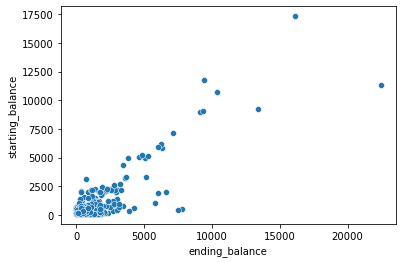

In [74]:
sns.scatterplot(data=savings,y='starting_balance',x='ending_balance')

<AxesSubplot:xlabel='monthlysavings', ylabel='starting_balance'>

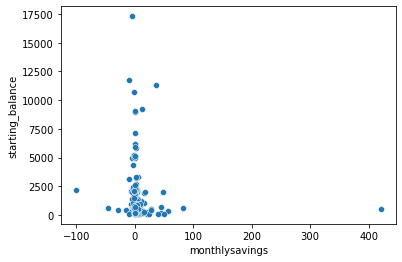

In [54]:
sns.scatterplot(data=savings,y="starting_balance",x="monthlysavings")

<AxesSubplot:xlabel='monthlysavings', ylabel='timedelta_months'>

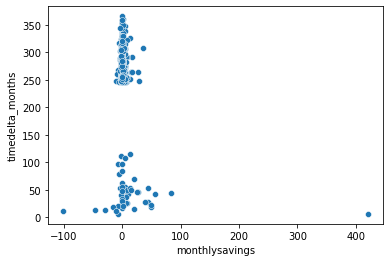

In [55]:
sns.scatterplot(data=savings,y='timedelta_months',x='monthlysavings')

<AxesSubplot:xlabel='balance_difference', ylabel='timedelta_months'>

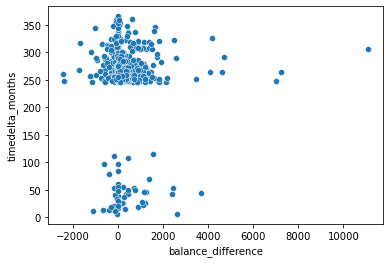

In [56]:
sns.scatterplot(data=savings,y='timedelta_months',x='balance_difference')

In [97]:
savings.dtypes

cust_id                        int64
acct_nbr                       int64
minimum_balance                int64
acct_type                     object
account_active                object
acct_start_date       datetime64[ns]
acct_end_date         datetime64[ns]
starting_balance             float64
ending_balance               float64
timedelta                      int32
timedelta_months             float64
balance_difference           float64
monthlysavings               float64
dtype: object

In [99]:
import copy

In [101]:
df_s = copy.deepcopy(savings)

col = [
    "starting_balance",
    "ending_balance",
    "timedelta_months",
    "monthlysavings",
]

df_s = df_s[col]

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_s)

saving_scale = pd.DataFrame(scaler.transform(df_s),columns = df_s.columns)

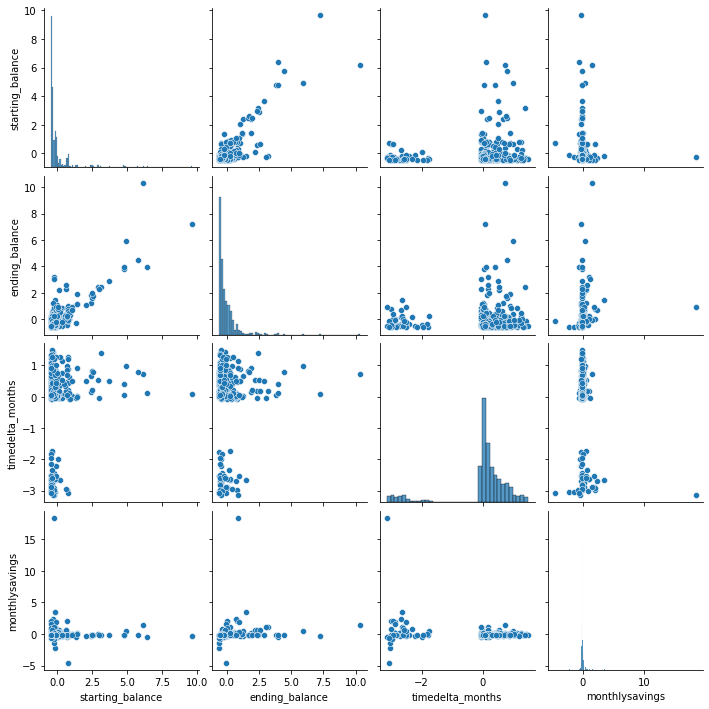

In [103]:
sns.pairplot(saving_scale)

In [105]:
from sklearn.preprocessing import Normalizer

n = Normalizer()
n.fit(df_s)
saving_norm = pd.DataFrame(n.transform(df_s),columns = df_s.columns)

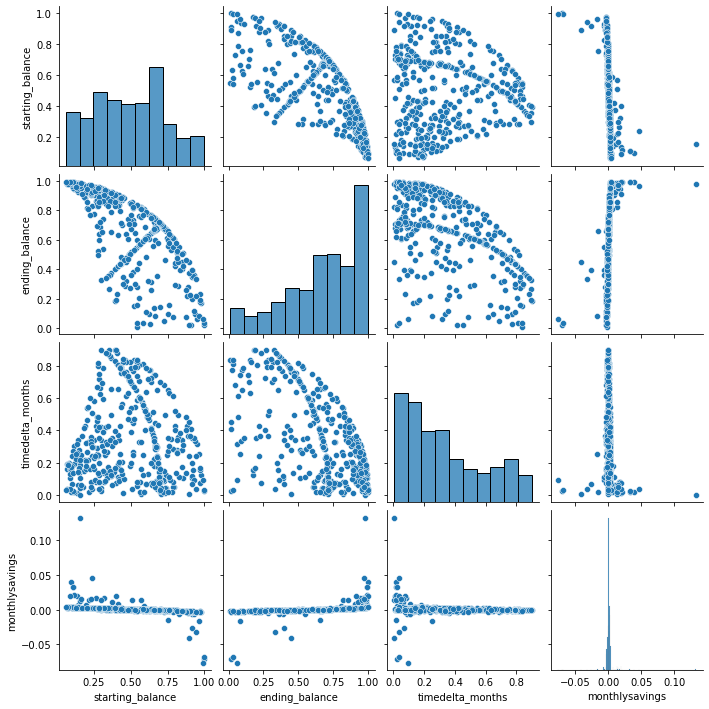

In [106]:
sns.pairplot(saving_norm)

In [109]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [110]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

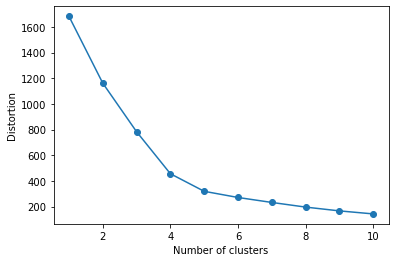

In [111]:
plot_distortion(saving_scale)

In [112]:
def silhouette(X,max_clusters = 9):
    distortions = []
    
    for i in range(2, max_clusters +1):
        
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0).fit(X)
        
        labels = km.labels_
        
        distortions.append((i,metrics.silhouette_score(X, labels, metric='euclidean')))

    return(distortions)

In [113]:
silhouette(saving_scale)

[(2, 0.7461464700529936),
 (3, 0.697568644022609),
 (4, 0.6940682622526256),
 (5, 0.6072730132950546),
 (6, 0.5824696720894001),
 (7, 0.5804875916830703),
 (8, 0.47760848935049216),
 (9, 0.4024741315205902)]

In [131]:
km = KMeans(
    n_clusters = 3,
    n_init = 10,
    random_state = 0
)

y_km = km.fit_predict(saving_scale)

In [118]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='.',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

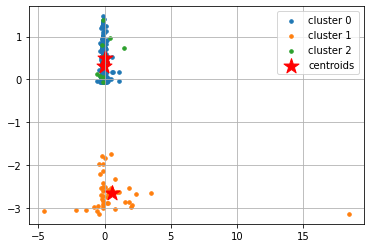

In [132]:
scaleda = saving_scale[['monthlysavings','timedelta_months']]
A = scaleda.values
plot_clusters(A, y_km, plt_cluster_centers=True)

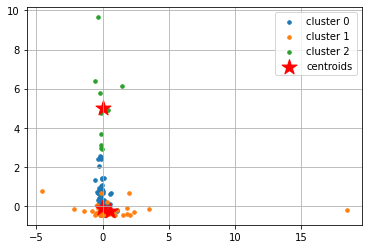

In [121]:
scaledb = saving_scale[['monthlysavings','starting_balance']]
B = scaledb.values
plot_clusters(B, y_km, plt_cluster_centers=True)

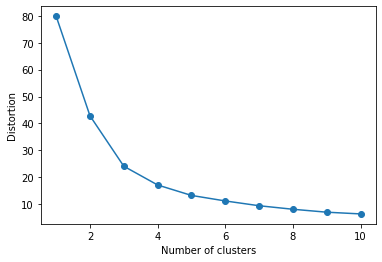

In [123]:
plot_distortion(saving_norm)

In [124]:
silhouette(saving_norm)

[(2, 0.4226359071749137),
 (3, 0.4916766816604382),
 (4, 0.4939479762498581),
 (5, 0.46943279508902425),
 (6, 0.42358594256650606),
 (7, 0.424473431161084),
 (8, 0.4290685323004232),
 (9, 0.42670247624428986)]

In [127]:
km2 = KMeans(
    n_clusters = 3,
    n_init = 10,
    random_state = 0
)

y_km2 = km2.fit_predict(saving_norm)

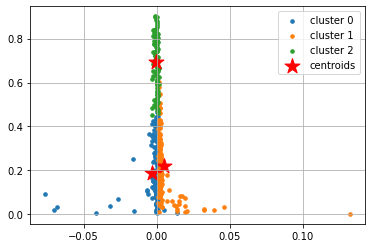

In [128]:
scaleda2 = saving_norm[['monthlysavings','timedelta_months']]
A2 = scaleda2.values
plot_clusters(A2, y_km2, plt_cluster_centers=True)

## CREDIT

In [144]:
credit = pd.read_csv("C:/Users/Tim/Desktop/lighthouse/w4\d2/mini-project-III-data/twm_credit_acct.csv",sep=';')

In [145]:
credit.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [146]:
credit.describe()

,cust_id,acct_nbr,credit_limit,credit_rating,starting_balance,ending_balance
count,4.680000e+02,4.680000e+02,468.000000,468.000000,468.000000,468.000000
mean,1.362986e+06,4.561143e+15,2647.649573,0.316239,1123.257521,1184.885662
std,2.920717e+02,2.920717e+03,2293.771202,1.453930,1636.254478,1363.065314
min,1.362480e+06,4.561143e+15,1000.000000,0.000000,0.000000,0.000000
25%,1.362727e+06,4.561143e+15,1000.000000,0.000000,0.000000,353.187500
50%,1.362974e+06,4.561143e+15,1900.000000,0.000000,568.300000,1000.000000
75%,1.363238e+06,4.561143e+15,3000.000000,0.000000,1631.635000,1358.717500
max,1.363493e+06,4.561143e+15,17300.000000,10.000000,11394.660000,9500.000000


In [147]:
credit.dtypes

cust_id               int64
acct_nbr              int64
credit_limit          int64
credit_rating         int64
account_active       object
acct_start_date      object
acct_end_date        object
starting_balance    float64
ending_balance      float64
dtype: object

In [148]:
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    return missing_
missing(credit)

,number,percent
acct_end_date,423,0.903846
ending_balance,0,0.000000
starting_balance,0,0.000000
acct_start_date,0,0.000000
account_active,0,0.000000
credit_rating,0,0.000000
credit_limit,0,0.000000
acct_nbr,0,0.000000
cust_id,0,0.000000


In [149]:
credit['acct_start_date'] = pd.to_datetime(credit['acct_start_date'],format='%d.%m.%Y')
credit['acct_end_date'] = credit['acct_end_date'].fillna(pd.to_datetime('07-02-2016'))
credit['acct_end_date'] = pd.to_datetime(credit['acct_end_date'], format = '%d.%m.%Y', errors = 'coerce')
credit['acct_end_date'] = credit['acct_end_date'].fillna(pd.to_datetime('07-02-2016'))

credit['timedelta'] = (credit['acct_end_date'].dt.date - credit['acct_start_date'].dt.date)
credit['timedelta'] = credit['timedelta'].dt.days.astype('int32')
credit['timedelta_months'] = (credit['timedelta']/30.4369)

In [150]:
credit['credit_difference'] = credit['ending_balance']-credit['starting_balance']

In [152]:
credit['monthlydebt'] = credit['credit_difference']/credit['timedelta_months']

In [157]:
credit.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,timedelta,timedelta_months,credit_difference,monthlydebt
0,1363160,4561143213631600,1000,0,Y,1988-10-12,2016-07-02,657.46,286.69,10125,332.655428,-370.77,-1.114577
1,1362487,4561143213624870,3000,0,Y,1995-08-08,2016-07-02,0.00,1548.23,7634,250.813979,1548.23,6.172822
2,1362548,4561143213625480,6700,0,Y,1986-11-11,2016-07-02,6965.25,68.68,10826,355.686683,-6896.57,-19.389452
3,1362752,4561143213627520,2400,0,N,1994-10-09,1995-04-02,2302.14,0.00,175,5.749600,-2302.14,-400.400028
4,1363017,4561143213630170,1000,0,Y,1995-02-08,2016-07-02,0.00,1000.00,7815,256.760708,1000.00,3.894677


<AxesSubplot:xlabel='ending_balance', ylabel='starting_balance'>

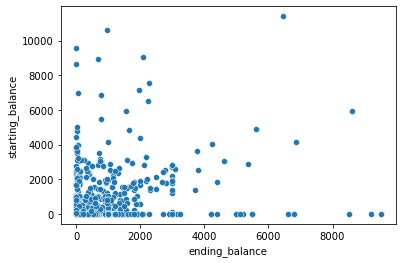

In [92]:
sns.scatterplot(data=credit,y='starting_balance',x='ending_balance')

<AxesSubplot:xlabel='balance_difference', ylabel='starting_balance'>

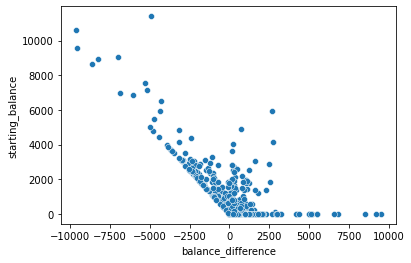

In [93]:
sns.scatterplot(data=credit,y='starting_balance',x='balance_difference')

<AxesSubplot:xlabel='timedelta_months', ylabel='monthlydebt'>

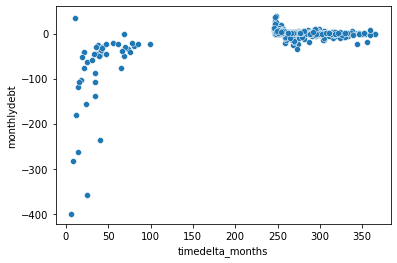

In [96]:
sns.scatterplot(data=credit,y='monthlydebt',x='timedelta_months')

<AxesSubplot:xlabel='balance_difference', ylabel='timedelta_months'>

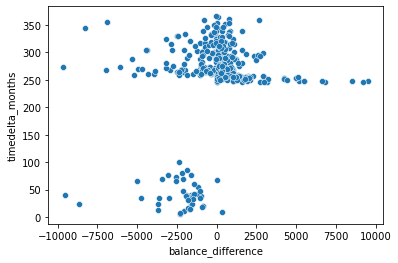

In [95]:
sns.scatterplot(data=credit,y='timedelta_months',x='credit_difference')

In [134]:
credit.dtypes

cust_id                        int64
acct_nbr                       int64
credit_limit                   int64
credit_rating                  int64
account_active                object
acct_start_date       datetime64[ns]
acct_end_date         datetime64[ns]
starting_balance             float64
ending_balance               float64
timedelta                      int32
timedelta_months             float64
balance_difference           float64
monthlydebt                  float64
dtype: object

In [135]:
df_c = copy.deepcopy(credit)

col2 = [
    "starting_balance",
    "timedelta_months",
    "balance_difference", #credit_difference
    "monthlydebt"
]

df_credit = df_c[col2]

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_credit)

credit_scale = pd.DataFrame(scaler.transform(df_credit),columns = df_credit.columns)

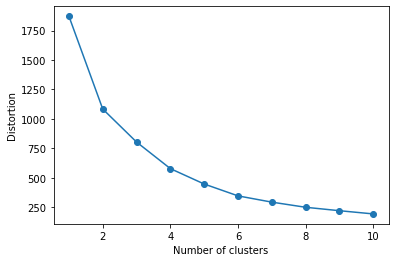

In [137]:
plot_distortion(credit_scale)

In [138]:
silhouette(credit_scale)

[(2, 0.672756706866568),
 (3, 0.5938954993453929),
 (4, 0.6107398801490843),
 (5, 0.3784510153971145),
 (6, 0.5005667489542673),
 (7, 0.3979777866065025),
 (8, 0.39633131426940704),
 (9, 0.3988998432820071)]

In [139]:
km = KMeans(
    n_clusters = 4,
    n_init = 10,
    random_state = 0
)

y_km = km.fit_predict(credit_scale)

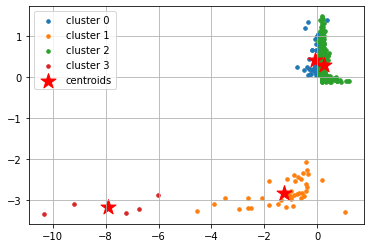

In [140]:
scaleda = credit_scale[['monthlydebt','timedelta_months']]
A = scaleda.values
plot_clusters(A, y_km, plt_cluster_centers=True)

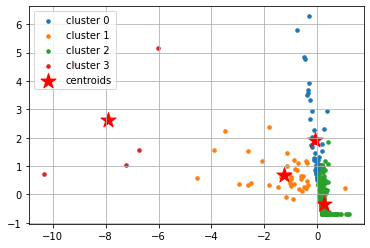

In [141]:
scaleda = credit_scale[['monthlydebt','starting_balance']]
A = scaleda.values
plot_clusters(A, y_km, plt_cluster_centers=True)

## BOTH

In [155]:
df = pd.DataFrame(pd.concat([savings['balance_difference'],credit['credit_difference']],axis = 1))

In [156]:
df.head()

,balance_difference,credit_difference
0,9.50,-370.77
1,-638.84,1548.23
2,3.78,-6896.57
3,9.07,-2302.14
4,890.33,1000.00


In [158]:
df = df.rename(columns = {
    "balance_difference":"savings_gained",
    "credit_difference":"debt_gained"
})

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

df = pd.DataFrame(scaler.transform(df),columns = df.columns)

In [162]:
df=df.dropna()

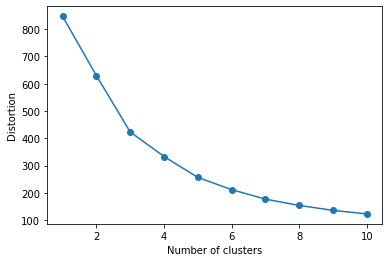

[(2, 0.7300042304618007),
 (3, 0.4702249071645412),
 (4, 0.40243518272003587),
 (5, 0.42679837463604314),
 (6, 0.4331305638997299),
 (7, 0.42720569736290503),
 (8, 0.34694880780771514),
 (9, 0.3552426830340388)]

In [163]:
plot_distortion(df)
silhouette(df)

In [164]:
km = KMeans(
    n_clusters = 4,
    n_init = 10,
    random_state = 0
)

y_km = km.fit_predict(df)

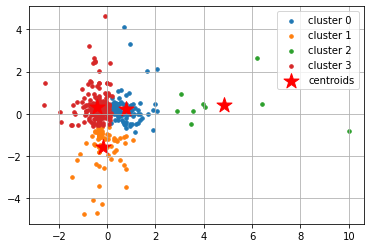

In [166]:
scaleda = df[['savings_gained','debt_gained']]
A = scaleda.values
plot_clusters(A, y_km, plt_cluster_centers=True)